In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_card_fraud_dataset.csv to credit_card_fraud_dataset (2).csv


In [ ]:
import pandas as pd
# Read the dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')

# Convert date column to datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Display basic info
print("Basic Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Fraud distribution
print("\nFraudulent vs Non-Fraudulent Transactions:")
print(df['IsFraud'].value_counts())

# Fraud percentage
fraud_percentage = df['IsFraud'].mean() * 100
print(f"\nFraud Percentage: {fraud_percentage:.2f}%")

# Plot 1: Transaction Amount Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.savefig('amount_distribution.png')
plt.close()

# Plot 2: Transactions Over Time
df.set_index('TransactionDate', inplace=True)
transactions_over_time = df['IsFraud'].resample('D').count()

plt.figure(figsize=(12, 6))
transactions_over_time.plot()
plt.title('Transactions Over Time')
plt.ylabel('Number of Transactions')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.savefig('transactions_over_time.png')
plt.close()

# Plot 3: Fraud rate by Transaction Type
fraud_by_type = df.groupby


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   TransactionID    100000 non-null  int64         
 1   TransactionDate  100000 non-null  datetime64[ns]
 2   Amount           100000 non-null  float64       
 3   MerchantID       100000 non-null  int64         
 4   TransactionType  100000 non-null  object        
 5   Location         100000 non-null  object        
 6   IsFraud          100000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.3+ MB
None

Summary Statistics:
       TransactionID                TransactionDate         Amount  \
count  100000.000000                         100000  100000.000000   
mean    50000.500000  2024-04-21 13:06:09.973745920    2497.092666   
min         1.000000     2023-10-21 09:28:35.824439       1.050000   
25%   

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')

# Check for missing values
print("Missing Values per Column:")
print(df.isnull().sum())

# Check for any duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")

# Optionally, view the duplicate rows
if duplicate_count > 0:
    print("\nSample Duplicate Rows:")
    print(df[df.duplicated()].head())


Missing Values per Column:
TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

Number of Duplicate Rows: 0


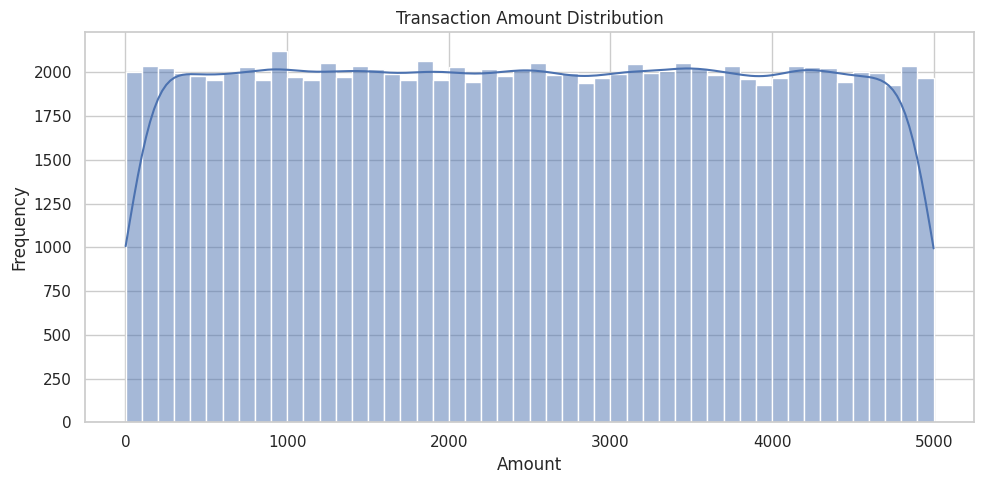

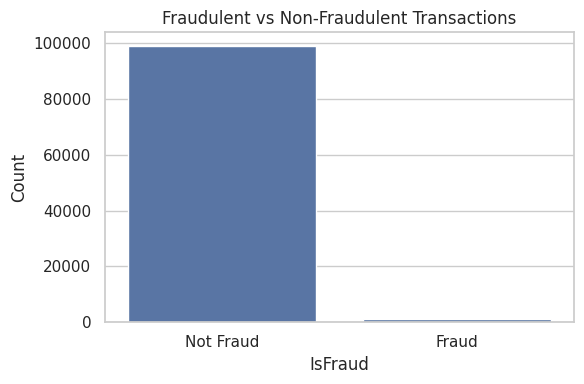

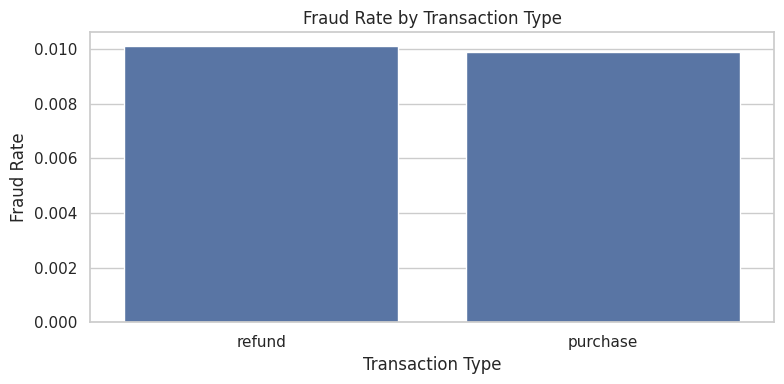

<ipython-input-6-f45affc66cc2>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='Reds_r')


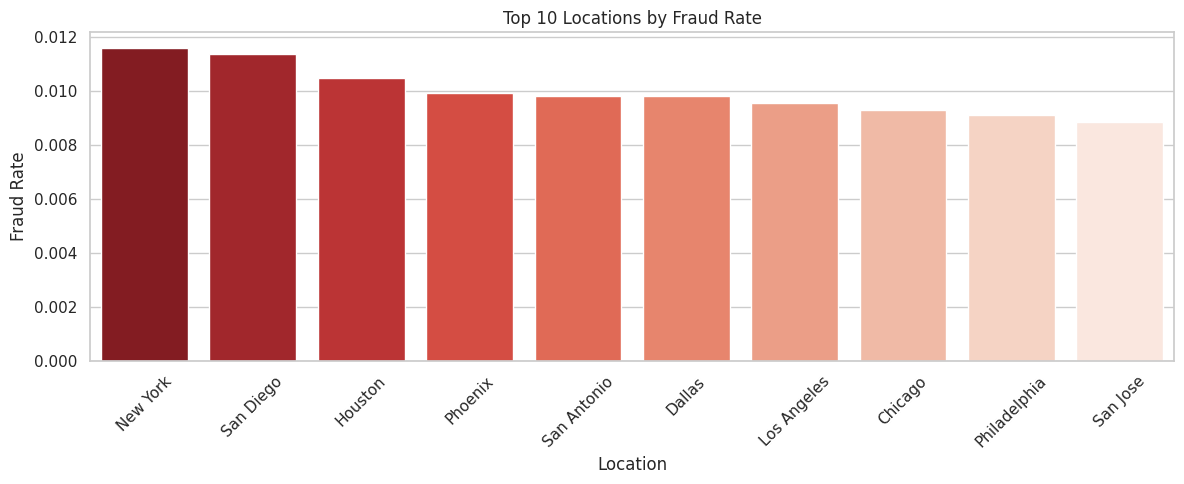

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Distribution of Transaction Amounts
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('amount_distribution.png')
plt.show()

# Plot 2: Count of Fraudulent vs Non-Fraudulent Transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='IsFraud', data=df)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('fraud_count.png')
plt.show()

# Plot 3: Fraud Rate by Transaction Type
plt.figure(figsize=(8, 4))
fraud_by_type = df.groupby('TransactionType')['IsFraud'].mean().sort_values(ascending=False)
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values)
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Type')
plt.tight_layout()
plt.savefig('fraud_by_transaction_type.png')
plt.show()

# Plot 4: Top 10 Locations by Fraud Rate
plt.figure(figsize=(12, 5))
top_locations = df.groupby('Location')['IsFraud'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_locations.index, y=top_locations.values, palette='Reds_r')
plt.title('Top 10 Locations by Fraud Rate')
plt.ylabel('Fraud Rate')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('fraud_by_location.png')
plt.show()


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')

# Identify target
target_column = 'IsFraud'

# Identify features (all columns except the target)
feature_columns = [col for col in df.columns if col != target_column]

print("Target Variable:")
print(target_column)

print("\nFeature Variables:")
print(feature_columns)


Target Variable:
IsFraud

Feature Variables:
['TransactionID', 'TransactionDate', 'Amount', 'MerchantID', 'TransactionType', 'Location']


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')

# Identify categorical columns (object dtype)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns to Convert:", categorical_cols)

# Convert 'TransactionDate' to datetime first if needed
if 'TransactionDate' in categorical_cols:
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
    categorical_cols.remove('TransactionDate')  # Don't one-hot encode datetime

# Apply one-hot encoding to remaining categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nConverted DataFrame Shape:", df_encoded.shape)
print("\nSample Columns After Encoding:")
print(df_encoded.columns[:10])


Categorical Columns to Convert: ['TransactionDate', 'TransactionType', 'Location']

Converted DataFrame Shape: (100000, 15)

Sample Columns After Encoding:
Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID', 'IsFraud',
       'TransactionType_refund', 'Location_Dallas', 'Location_Houston',
       'Location_Los Angeles', 'Location_New York'],
      dtype='object')


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')

# Convert 'TransactionDate' to datetime to avoid encoding it
if 'TransactionDate' in df.columns:
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# Identify categorical columns (excluding 'TransactionDate')
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns = [col for col in categorical_columns if col != 'TransactionDate']

print("Categorical columns to encode:", categorical_columns)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Output summary
print("\nDataFrame shape before encoding:", df.shape)
print("DataFrame shape after encoding:", df_encoded.shape)
print("\nSample of encoded columns:")
print(df_encoded.columns[:10])


Categorical columns to encode: ['TransactionType', 'Location']

DataFrame shape before encoding: (100000, 7)
DataFrame shape after encoding: (100000, 15)

Sample of encoded columns:
Index(['TransactionID', 'TransactionDate', 'Amount', 'MerchantID', 'IsFraud',
       'TransactionType_refund', 'Location_Dallas', 'Location_Houston',
       'Location_Los Angeles', 'Location_New York'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')

# Optional: Convert datetime
if 'TransactionDate' in df.columns:
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
    df.drop(columns=['TransactionDate'], inplace=True)

# Drop non-numeric identifiers that shouldn't be scaled (optional)
drop_cols = ['TransactionID']
df = df.drop(columns=drop_cols, errors='ignore')

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Separate target and features
target = 'IsFraud'
X = df.drop(columns=[target])
y = df[target]

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to features
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Combine scaled features with target for reference
df_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Output
print("Scaled feature sample:")
print(df_scaled.head())


Scaled feature sample:
     Amount  MerchantID  TransactionType_refund  Location_Dallas  \
0  1.173161    0.645357                0.997383        -0.334739   
1  0.112740   -1.360085                0.997383         2.987402   
2 -1.187661   -0.372950               -1.002623        -0.334739   
3  0.705284    1.532047               -1.002623        -0.334739   
4 -1.475326   -0.092396               -1.002623        -0.334739   

   Location_Houston  Location_Los Angeles  Location_New York  \
0         -0.333167             -0.332147          -0.333204   
1         -0.333167             -0.332147          -0.333204   
2         -0.333167             -0.332147           3.001167   
3         -0.333167             -0.332147          -0.333204   
4         -0.333167             -0.332147          -0.333204   

   Location_Philadelphia  Location_Phoenix  Location_San Antonio  \
0              -0.330976         -0.332592              2.989713   
1              -0.330976         -0.332592     

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')

# Optional: Convert and drop date column
if 'TransactionDate' in df.columns:
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
    df.drop(columns=['TransactionDate'], inplace=True)

# Drop identifier column
df.drop(columns=['TransactionID'], inplace=True, errors='ignore')

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define target and features
target = 'IsFraud'
X = df.drop(columns=[target])
y = df[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets (80/20) with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Output the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (80000, 12)
X_test shape: (20000, 12)
y_train shape: (80000,)
y_test shape: (20000,)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')

# Preprocessing: Convert and drop date
if 'TransactionDate' in df.columns:
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
    df.drop(columns=['TransactionDate'], inplace=True)

# Drop ID column
df.drop(columns=['TransactionID'], inplace=True, errors='ignore')

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop(columns=['IsFraud'])
y = df['IsFraud']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.99

Confusion Matrix:
 [[19800     0]
 [  200     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt

# Assume these are already defined from your model
# y_test: true labels
# y_pred: predicted class labels
# y_proba: predicted probabilities for the positive class (if applicable)

# 1. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 2. Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 3. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 4. ROC AUC Score (if you have probabilities)
try:
    auc_score = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {auc_score:.4f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('roc_curve.png')
    plt.show()
except:
    print("\nSkipping ROC AUC: Probabilities not available.")


Accuracy: 0.99

Confusion Matrix:
[[19800     0]
 [  200     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19800
           1       0.00      0.00      0.00       200

    accuracy                           0.99     20000
   macro avg       0.49      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000


Skipping ROC AUC: Probabilities not available.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load and prepare dataset
df = pd.read_csv('credit_card_fraud_dataset.csv')

# Convert datetime and drop if not needed
if 'TransactionDate' in df.columns:
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
    df.drop(columns=['TransactionDate'], inplace=True)

# Drop non-predictive columns like IDs
df.drop(columns=['TransactionID'], inplace=True, errors='ignore')

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Split features and target
target = 'IsFraud'
X = df.drop(columns=[target])
y = df[target]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Output shapes
print(f"Training set shape: X={X_train.shape}, y={y_train.shape}")
print(f"Test set shape: X={X_test.shape}, y={y_test.shape}")
# Removed the undefined variable 'c'

Training set shape: X=(80000, 12), y=(80000,)
Test set shape: X=(20000, 12), y=(20000,)


In [ ]:
import pandas as pd

# Example new input
new_input = {
    'Amount': 180.0,
    'Merchant': 'Amazon',
    'Location': 'New York',
    'TransactionType': 'Online'
}

# Convert to DataFrame
new_df = pd.DataFrame([new_input])

# Load original dataset to capture all columns used during training
df = pd.read_csv('credit_card_fraud_dataset.csv')

# Drop target and unnecessary columns
df.drop(columns=['TransactionID', 'TransactionDate', 'IsFraud'], inplace=True, errors='ignore')

# Combine new input with the original dataset (needed for consistent one-hot encoding)
combined = pd.concat([df, new_df], ignore_index=True)

# One-hot encode categorical columns
combined_encoded = pd.get_dummies(combined, drop_first=True)

# Extract the last row (which corresponds to the new input)
encoded_new_input = combined_encoded.tail(1)

# Output
print("Encoded new input DataFrame:")
print(encoded_new_input)


Encoded new input DataFrame:
        Amount  MerchantID  TransactionType_purchase  TransactionType_refund  \
100000   180.0         NaN                     False                   False   

        Location_Dallas  Location_Houston  Location_Los Angeles  \
100000            False             False                 False   

        Location_New York  Location_Philadelphia  Location_Phoenix  \
100000               True                  False             False   

        Location_San Antonio  Location_San Diego  Location_San Jose  
100000                 False               False              False  


In [ ]:
pip install streamlit


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load data and train the model
def train_model(csv_path='credit_card_fraud_dataset.csv'):
    # Load data
    df = pd.read_csv(csv_path)

    # Drop unnecessary columns
    df.drop(columns=['TransactionID', 'TransactionDate'], inplace=True, errors='ignore')

    # One-hot encode categorical columns
    df_encoded = pd.get_dummies(df, drop_first=True)

    # Separate features and target
    X = df_encoded.drop(columns=['IsFraud'])
    y = df_encoded['IsFraud']

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load data and train the model
def train_model(csv_path='credit_card_fraud_dataset.csv'):
    # Load data
    df = pd.read_csv(csv_path)

    # Drop unnecessary columns
    df.drop(columns=['TransactionID', 'TransactionDate'], inplace=True, errors='ignore')

    # One-hot encode categorical columns
    df_encoded = pd.get_dummies(df, drop_first=True)

    # Separate features and target
    X = df_encoded.drop(columns=['IsFraud'])
    y = df_encoded['IsFraud']

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00
